In [1]:
import matplotlib.pyplot as plt
import seaborn as sns  
import pandas as pd
import numpy as np
import scipy.stats as stats
import chardet
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import f_oneway,tukey_hsd
from scipy.stats import chisquare, chi2, chi2_contingency 
from statsmodels.graphics.factorplots import interaction_plot
import statsmodels.formula.api as smf
from scipy.stats import mstats

# Detect encoding
# with open('combined_listings.csv', 'rb') as f:
#     result = chardet.detect(f.read())
#     encoding = result['encoding']

# print(f"Detected encoding: {encoding}")

# Now use the detected encoding to read the CSV
# df = pd.read_csv('Listings.csv', encoding=encoding)

df = pd.read_csv('combined_data.csv')
df.fillna(0, inplace=True)
df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
df_HongKong = df[df['City'] == 'Hong Kong'];
df_NewYork = df[df['City'] == 'New York'];
df_Mexico_City = df[df['City'] == 'Mexico City'];
df_Paris = df[df['City'] == 'Paris'];
df_Rio = df[df['City'] == 'Rio de Janeiro'];
df_Tokyo = df[df['City'] == 'Tokyo'];

<>:28: SyntaxWarning: invalid escape sequence '\$'
<>:28: SyntaxWarning: invalid escape sequence '\$'
C:\Users\ayush\AppData\Local\Temp\ipykernel_20604\855770181.py:28: SyntaxWarning: invalid escape sequence '\$'
  df['price'] = df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
C:\Users\ayush\AppData\Local\Temp\ipykernel_20604\855770181.py:26: DtypeWarning: Columns (7,27,59,60,68) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('combined_data.csv')


In [2]:
df_HongKong = df[(df['City'] == 'Hong Kong') & (df['price'] > 0)];
df_NewYork = df[(df['City'] == 'New York') & (df['price'] > 0)];
df_Mexico_City = df[(df['City'] == 'Mexico City') & (df['price'] > 0)];
df_Paris = df[(df['City'] == 'Paris') & (df['price'] > 0)];
df_Rio = df[(df['City'] == 'Rio de Janeiro') & (df['price'] > 0)];
df_Tokyo = df[(df['City'] == 'Tokyo') & (df['price'] > 0)];

df_HongKong["price"] = df_HongKong["price"] * 0.169
df_NewYork["price"] = df_NewYork["price"] * 1.36;
df_Mexico_City["price"] = df_Mexico_City["price"] * 0.076
df_Paris["price"] = df_Paris["price"] * 1.62
df_Rio["price"] = df_Rio["price"] * 0.276
df_Tokyo["price"] = df_Tokyo["price"] * 0.0088

combined_df = pd.concat([df_HongKong, df_NewYork, df_Mexico_City, df_Paris, df_Rio, df_Tokyo], axis=0)

C:\Users\ayush\AppData\Local\Temp\ipykernel_20604\30083051.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_HongKong["price"] = df_HongKong["price"] * 0.169
C:\Users\ayush\AppData\Local\Temp\ipykernel_20604\30083051.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_NewYork["price"] = df_NewYork["price"] * 1.36;
C:\Users\ayush\AppData\Local\Temp\ipykernel_20604\30083051.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [3]:
# import numpy as np
# import pandas as pd

# Define the haversine function if it's not already defined
def haversine(lat1, lon1, lat2, lon2):
    # Calculations for the haversine distance
    R = 6371  # Radius of Earth in kilometers
    dlat = np.radians(lat2 - lat1)
    dlon = np.radians(lon2 - lon1)
    a = np.sin(dlat / 2) ** 2 + np.cos(np.radians(lat1)) * np.cos(np.radians(lat2)) * np.sin(dlon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    return R * c

def group_distance_price(df_attraction, df):
    distances = []
    attraction_names = []

    for idx, hotel in df.iterrows():
        hotel_distances = []
        hotel_attractions = []
        
        for _, attraction in df_attraction.iterrows():
            # Calculate the distance between hotel and attraction
            distance = haversine(
                hotel['Latitude_decimal'], hotel['Longitude_decimal'], 
                attraction['Latitude_decimal'], attraction['Longitude_decimal']
            )
            hotel_distances.append(distance)
            hotel_attractions.append(attraction["Attractions"])
            
        distances.append(hotel_distances)
        attraction_names.append(hotel_attractions)

    # Add distances and attractions as new columns in df
    df["Distances_to_Attractions_km"] = distances
    df["Attractions_in_District"] = attraction_names

    # Calculate average distance for each hotel and add as a new column
    df["Average_Distance_to_Attractions_km"] = df["Distances_to_Attractions_km"].apply(
        lambda x: np.nan if len(x) == 0 else np.mean(x)
    )

    # # Define distance ranges (in kilometers)
    # distance_bins = [0, 3.9, 5.9, 9, float('inf')]
    # distance_labels = ['0-3.9 km', '4-5.9 km', '6-9 km', '9 km+']

    # df_expanded = df.explode('Distances_to_Attractions_km')

    # # Convert exploded distances to numeric
    # df_expanded['Distances_to_Attractions_km'] = pd.to_numeric(df_expanded['Distances_to_Attractions_km'])

    # # Create a new column with distance range
    # df_expanded['Distance_Range'] = pd.cut(
    #     df_expanded['Distances_to_Attractions_km'],
    #     bins=distance_bins,
    #     labels=distance_labels,
    #     include_lowest=True
    # )

    # # Define price ranges (in your currency, e.g., USD)
    # price_bins = [0, 200, 400, 600, float('inf')]
    # price_labels = ['$0-$200', '$201-$400', '$401-$600', '>$600']

    # # Create a new column with price range
    # df_expanded['Price_Range'] = pd.cut(
    #     df_expanded['price'],
    #     bins=price_bins,
    #     labels=price_labels,
    #     include_lowest=True
    # )

    return df

def convert_to_decimal(coord):
    # Remove the degree symbol and any whitespace, then split into value and direction
    coord = coord.replace("°", "").strip()
    value, direction = coord[:-1], coord[-1]
    decimal = float(value)
    
    # Make the decimal negative if the direction is South or West
    if direction in ['S', 'W']:
        decimal = -decimal
    
    return decimal



In [4]:
pt = [];
df_attraction = pd.DataFrame(
    {
    "Attractions": [
        'Tokyo'
    ],
    "Latitude": [
        "35.667° N"
    ],
    "Longitude": [
        "139.739° E"
    ],
    "District": [
        'Tokyo'
    ]
}
)
df_Tokyo = combined_df[combined_df['City'] == 'Tokyo']

# Initialize lists to store data for plotting
distance_list = []
room_type_list = []
mean_price_list = []
ci_lower_list = []
ci_upper_list = []

df_attraction["Latitude_decimal"] = df_attraction["Latitude"].apply(convert_to_decimal)
df_attraction["Longitude_decimal"] = df_attraction["Longitude"].apply(convert_to_decimal)

df_Tokyo["latitude"] = df_Tokyo["latitude"].astype(str)
df_Tokyo["longitude"] = df_Tokyo["longitude"].astype(str)
df_Tokyo["Latitude_decimal"] = df_Tokyo["latitude"].apply(convert_to_decimal)
df_Tokyo["Longitude_decimal"] = df_Tokyo["longitude"].apply(convert_to_decimal)

df_Tokyo = group_distance_price(df_attraction, df_Tokyo);

neighbourhood_cleansed = np.array(df_Tokyo['neighbourhood_cleansed'].unique())

for x in neighbourhood_cleansed:
    # n1=400
    # u = stats.randint(0,len(df_Tokyo))
    # ls = u.rvs(size=n1,random_state= 42)
    rows = df_Tokyo

    if len(rows[rows['neighbourhood_cleansed'] == x]) > 2:
        if x == 'Edogawa Ku':
            pt = rows[rows['neighbourhood_cleansed'] == x]
        print(" For ", x,':')

        print(rows[rows['neighbourhood_cleansed'] == x]['Average_Distance_to_Attractions_km'].sum() / rows[rows['neighbourhood_cleansed'] == x]['price'].sum())

        # rows[rows['neighbourhood_cleansed'] == 'Buttes-Montmartre']['Average_Distance_to_Attractions_km'].sum() / rows[rows['neighbourhood_cleansed'] == 'Buttes-Montmartre']['price'].sum()

        df_filter = rows[rows['neighbourhood_cleansed'] == x]

        print(df_filter["Average_Distance_to_Attractions_km"].mean())
        print(df_filter["price"].mean())

        X = sm.add_constant(np.log(df_filter['Average_Distance_to_Attractions_km']))

        model = sm.OLS(np.log(df_filter['price']), X).fit() # This method produces a model with intercept.
        # model = sm.OLS(speed, height).fit() # This method produces a model without intercept. Observe the difference between the two models 

        print(model.summary())

C:\Users\ayush\AppData\Local\Temp\ipykernel_20604\3785368361.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Tokyo["latitude"] = df_Tokyo["latitude"].astype(str)
C:\Users\ayush\AppData\Local\Temp\ipykernel_20604\3785368361.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Tokyo["longitude"] = df_Tokyo["longitude"].astype(str)
C:\Users\ayush\AppData\Local\Temp\ipykernel_20604\3785368361.py:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

 For  Sumida Ku :
0.05057572735219513
8.012454670412618
158.42490241645245
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     34.30
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           5.54e-09
Time:                        10:13:21   Log-Likelihood:                -2024.3
No. Observations:                1945   AIC:                             4053.
Df Residuals:                    1943   BIC:                             4064.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     410.6
Date:                Fri, 08 Nov 2024   Prob (F-statistic):             0.0314
Time:                        10:13:22   Log-Likelihood:                 8.6512
No. Observations:                   3   AIC:                            -13.30
Df Residuals:                       1   BIC:                            -15.11
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=9 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=19 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=16 observations were given.
  return hypotest_fun_in(*args, **kwds)


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.471
Model:                            OLS   Adj. R-squared:                  0.395
Method:                 Least Squares   F-statistic:                     6.227
Date:                Fri, 08 Nov 2024   Prob (F-statistic):             0.0413
Time:                        10:13:22   Log-Likelihood:                -8.7676
No. Observations:                   9   AIC:                             21.54
Df Residuals:                       7   BIC:                             21.93
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=12 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20

15.109884373885516
153.93693333333331
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                 -0.048
Method:                 Least Squares   F-statistic:                    0.4981
Date:                Fri, 08 Nov 2024   Prob (F-statistic):              0.496
Time:                        10:13:23   Log-Likelihood:                -12.400
No. Observations:                  12   AIC:                             28.80
Df Residuals:                      10   BIC:                             29.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=8 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 ob

 For  Fussa Shi :
0.6340609968238513
37.19452532248458
58.66080000000001
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.373
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3.571
Date:                Fri, 08 Nov 2024   Prob (F-statistic):              0.108
Time:                        10:13:23   Log-Likelihood:                -2.2685
No. Observations:                   8   AIC:                             8.537
Df Residuals:                       6   BIC:                             8.696
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------

c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\regression\linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 3 samples were given.
  warn("omni_normtest is not valid

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     6.808
Date:                Fri, 08 Nov 2024   Prob (F-statistic):             0.0797
Time:                        10:13:23   Log-Likelihood:               -0.35791
No. Observations:                   5   AIC:                             4.716
Df Residuals:                       3   BIC:                             3.935
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 4 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [5]:
from random import seed

kt = [];
df_attraction = pd.DataFrame(
    {
    "Attractions": [
        "Paris"
    ],
    "Latitude": [
        "48.8534° N"
    ],
    "Longitude": [
        "2.3488° E"
    ],
    "District": [
        "Paris"
    ]
}
)

# Initialize lists to store data for plotting
distance_list = []
room_type_list = []
mean_price_list = []
ci_lower_list = []
ci_upper_list = []

df_Paris = combined_df[combined_df['City'] == 'Paris']

df_attraction["Latitude_decimal"] = df_attraction["Latitude"].apply(convert_to_decimal)
df_attraction["Longitude_decimal"] = df_attraction["Longitude"].apply(convert_to_decimal)

df_Paris["latitude"] = df_Paris["latitude"].astype(str)
df_Paris["longitude"] = df_Paris["longitude"].astype(str)
df_Paris["Latitude_decimal"] = df_Paris["latitude"].apply(convert_to_decimal)
df_Paris["Longitude_decimal"] = df_Paris["longitude"].apply(convert_to_decimal)

df_Paris = group_distance_price(df_attraction, df_Paris);

neighbourhood_cleansed = np.array(df_Paris['neighbourhood_cleansed'].unique())

for x in neighbourhood_cleansed:
    # n1=400
    # u = stats.randint(0,len(df_Paris))
    # ls = u.rvs(size=n1,random_state= 42)
    rows = df_Paris

    if x == 'Gobelins':
            kt = rows[rows['neighbourhood_cleansed'] == x]

    if len(rows[rows['neighbourhood_cleansed'] == x]) > 2:
        print(" For ", x,':')

        print(rows[rows['neighbourhood_cleansed'] == x]['Average_Distance_to_Attractions_km'].sum() / rows[rows['neighbourhood_cleansed'] == x]['price'].sum())

        # rows[rows['neighbourhood_cleansed'] == 'Buttes-Montmartre']['Average_Distance_to_Attractions_km'].sum() / rows[rows['neighbourhood_cleansed'] == 'Buttes-Montmartre']['price'].sum()

        df_filter = rows[rows['neighbourhood_cleansed'] == x]

        print(df_filter["Average_Distance_to_Attractions_km"].mean())
        print(df_filter["price"].mean())

        X = sm.add_constant(np.log(df_filter['Average_Distance_to_Attractions_km']))

        model = sm.OLS(np.log(df_filter['price']), X).fit() # This method produces a model with intercept.
        # model = sm.OLS(speed, height).fit() # This method produces a model without intercept. Observe the difference between the two models 

        print(model.summary())


C:\Users\ayush\AppData\Local\Temp\ipykernel_20604\2610667839.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Paris["latitude"] = df_Paris["latitude"].astype(str)
C:\Users\ayush\AppData\Local\Temp\ipykernel_20604\2610667839.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Paris["longitude"] = df_Paris["longitude"].astype(str)
C:\Users\ayush\AppData\Local\Temp\ipykernel_20604\2610667839.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using 

 For  Observatoire :
0.00928814145913247
3.045563773715704
327.8980824222035
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     67.21
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           3.95e-16
Time:                        10:13:55   Log-Likelihood:                -2448.8
No. Observations:                2378   AIC:                             4902.
Df Residuals:                    2376   BIC:                             4913.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------

In [6]:
df_attraction = pd.DataFrame(
    {
    "Attractions": [
        "Mexico"
    ],
    "Latitude": [
        "35.0844° N"
    ],
    "Longitude": [
        "106.6504° W"
    ],
    "District": [
        "Mexico"
    ]
}
)

ct = [];

df_Mexico_City = combined_df[combined_df['City'] == 'Mexico City']

df_attraction["Latitude_decimal"] = df_attraction["Latitude"].apply(convert_to_decimal)
df_attraction["Longitude_decimal"] = df_attraction["Longitude"].apply(convert_to_decimal)

df_Mexico_City["latitude"] = df_Mexico_City["latitude"].astype(str)
df_Mexico_City["longitude"] = df_Mexico_City["longitude"].astype(str)
df_Mexico_City["Latitude_decimal"] = df_Mexico_City["latitude"].apply(convert_to_decimal)
df_Mexico_City["Longitude_decimal"] = df_Mexico_City["longitude"].apply(convert_to_decimal)

df_Mexico_City = group_distance_price(df_attraction, df_Mexico_City);

neighbourhood_cleansed = np.array(df_Mexico_City['neighbourhood_cleansed'].unique())

for x in neighbourhood_cleansed:
    # n1=400
    # u = stats.randint(0,len(df_Mexico_City))
    # ls = u.rvs(size=n1,random_state= 42)
    rows = df_Mexico_City
    if x == 'Cuauhtemoc':
            ct = rows[rows['neighbourhood_cleansed'] == x]

    if len(rows[rows['neighbourhood_cleansed'] == x]) > 2:
        print(" For ", x,':')


        print(rows[rows['neighbourhood_cleansed'] == x]['Average_Distance_to_Attractions_km'].sum() / rows[rows['neighbourhood_cleansed'] == x]['price'].sum())

        # rows[rows['neighbourhood_cleansed'] == 'Buttes-Montmartre']['Average_Distance_to_Attractions_km'].sum() / rows[rows['neighbourhood_cleansed'] == 'Buttes-Montmartre']['price'].sum()

        df_filter = rows[rows['neighbourhood_cleansed'] == x]

        print(df_filter["Average_Distance_to_Attractions_km"].mean())
        print(df_filter["price"].mean())

        X = sm.add_constant(np.log(df_filter['Average_Distance_to_Attractions_km']))

        model = sm.OLS(np.log(df_filter['price']), X).fit() # This method produces a model with intercept.
        # model = sm.OLS(speed, height).fit() # This method produces a model without intercept. Observe the difference between the two models 

        print(model.summary())


#tukeyhsd.plot_simultaneous(); # This works too with most basic graph with default figure size and without labels for the axes.

    # df_filter = rows[rows['neighbourhood_cleansed'] == 'Miguel Hidalgo']

    # print(df_filter["Average_Distance_to_Attractions_km"].mean())
    # print(df_filter["price"].mean())

    # X = sm.add_constant(np.log(df_filter['Average_Distance_to_Attractions_km']))

    # model = sm.OLS(np.log(df_filter['price']), X).fit() # This method produces a model with intercept.
    # # model = sm.OLS(speed, height).fit() # This method produces a model without intercept. Observe the difference between the two models 

    # print(model.summary())


    # df_filter = rows[rows['neighbourhood_cleansed'] == 'Gustavo A. Madero']

    # print(df_filter["Average_Distance_to_Attractions_km"].mean())
    # print(df_filter["price"].mean())

    # X = sm.add_constant(np.log(df_filter['Average_Distance_to_Attractions_km']))

    # model = sm.OLS(np.log(df_filter['price']), X).fit() # This method produces a model with intercept.
    # # model = sm.OLS(speed, height).fit() # This method produces a model without intercept. Observe the difference between the two models 

    # print(model.summary())

    # df_filter = rows[rows['neighbourhood_cleansed'] == 'Coyoacan']

    # print(df_filter["Average_Distance_to_Attractions_km"].mean())
    # print(df_filter["price"].mean())

    # X = sm.add_constant(np.log(df_filter['Average_Distance_to_Attractions_km']))

    # model = sm.OLS(np.log(df_filter['price']), X).fit() # This method produces a model with intercept.
    # # model = sm.OLS(speed, height).fit() # This method produces a model without intercept. Observe the difference between the two models 

    # print(model.summary())

    # df_filter = rows[rows['neighbourhood_cleansed'] == 'Tlalpan']

    # print(df_filter["Average_Distance_to_Attractions_km"].mean())
    # print(df_filter["price"].mean())

    # X = sm.add_constant(np.log(df_filter['Average_Distance_to_Attractions_km']))

    # model = sm.OLS(np.log(df_filter['price']), X).fit() # This method produces a model with intercept.
    # # model = sm.OLS(speed, height).fit() # This method produces a model without intercept. Observe the difference between the two models 

    # print(model.summary())

C:\Users\ayush\AppData\Local\Temp\ipykernel_20604\795435806.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Mexico_City["latitude"] = df_Mexico_City["latitude"].astype(str)
C:\Users\ayush\AppData\Local\Temp\ipykernel_20604\795435806.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Mexico_City["longitude"] = df_Mexico_City["longitude"].astype(str)
C:\Users\ayush\AppData\Local\Temp\ipykernel_20604\795435806.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

 For  Cuauhtemoc :
15.214212784336684
1890.6946882159564
124.27160806916424
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     337.4
Date:                Fri, 08 Nov 2024   Prob (F-statistic):           2.92e-74
Time:                        10:14:08   Log-Likelihood:                -12253.
No. Observations:               11104   AIC:                         2.451e+04
Df Residuals:                   11102   BIC:                         2.453e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------

In [7]:
data = {
    'value': pd.concat([
        df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'La Magdalena Contreras']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Iztapalapa']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Cuauhtemoc']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Miguel Hidalgo']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Tlalpan']['price'].sample(n=400, replace=True).reset_index(drop=True),
        
        df_Paris[df_Paris['neighbourhood_cleansed'] == 'Hôtel-de-Ville']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Paris[df_Paris['neighbourhood_cleansed'] == 'Louvre']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Paris[df_Paris['neighbourhood_cleansed'] == 'Temple']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Paris[df_Paris['neighbourhood_cleansed'] == 'Opéra']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Paris[df_Paris['neighbourhood_cleansed'] == 'Popincourt']['price'].sample(n=400, replace=True).reset_index(drop=True),

        df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Fuchu Shi']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Chuo Ku']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Shibuya Ku']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Kita Ku']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Shinagawa Ku']['price'].sample(n=400, replace=True).reset_index(drop=True)
    ], ignore_index=True),
    
    'distance': pd.concat([
        df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'La Magdalena Contreras']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
        df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Iztapalapa']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
        df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Cuauhtemoc']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
        df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Miguel Hidalgo']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
        df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Tlalpan']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),

        df_Paris[df_Paris['neighbourhood_cleansed'] == 'Hôtel-de-Ville']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
        df_Paris[df_Paris['neighbourhood_cleansed'] == 'Louvre']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
        df_Paris[df_Paris['neighbourhood_cleansed'] == 'Temple']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
        df_Paris[df_Paris['neighbourhood_cleansed'] == 'Opéra']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
        df_Paris[df_Paris['neighbourhood_cleansed'] == 'Popincourt']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),

        df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Fuchu Shi']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
        df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Chuo Ku']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
        df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Shibuya Ku']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
        df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Kita Ku']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
        df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Shinagawa Ku']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True)
    ], ignore_index=True),
    
    # Add 'group' and 'country' lists to match the number of samples (400 per neighborhood)
    'group': (
        ['La Magdalena Contreras'] * 400 + ['Iztapalapa'] * 400 + ['Cuauhtemoc'] * 400 +
        ['Miguel Hidalgo'] * 400 + ['Tlalpan'] * 400 +
        ['Hôtel-de-Ville'] * 400 + ['Louvre'] * 400 + ['Temple'] * 400 + 
        ['Opéra'] * 400 + ['Popincourt'] * 400 +
        ['Fuchu Shi'] * 400 + ['Chuo Ku'] * 400 + ['Shibuya Ku'] * 400 + 
        ['Kita Ku'] * 400 + ['Shinagawa Ku'] * 400
    ),
    
    'country': ['Mexico City'] * 2000 + ['Paris'] * 2000 + ['Tokyo'] * 2000
}

# Convert the dictionary to a DataFrame
df_2_ANOVA = pd.DataFrame(data)

# Fit the model
model = ols('value ~ group', data=df_2_ANOVA).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model)
print(anova_table)

tukeyhsd = pairwise_tukeyhsd(endog=df_2_ANOVA['value'], groups=df_2_ANOVA['group'], alpha=0.05)

# Convert Tukey HSD results to a DataFrame
tukey_results_df = pd.DataFrame(data=tukeyhsd._results_table.data[1:], columns=tukeyhsd._results_table.data[0])

# Export to CSV
tukey_results_df.to_csv('tukey_hsd_results.csv', index=False)

tukeyhsd.summary()


              df        sum_sq       mean_sq          F         PR(>F)
group       14.0  1.690164e+08  1.207260e+07  40.488945  1.071766e-106
Residual  5985.0  1.784549e+09  2.981702e+05        NaN            NaN


group1,group2,meandiff,p-adj,lower,upper,reject
Chuo Ku,Cuauhtemoc,-128.3932,0.0617,-259.3893,2.6029,False
Chuo Ku,Fuchu Shi,-175.1234,0.0006,-306.1195,-44.1273,True
Chuo Ku,Hôtel-de-Ville,387.7432,0.0,256.7471,518.7393,True
Chuo Ku,Iztapalapa,-194.374,0.0001,-325.3701,-63.3779,True
Chuo Ku,Kita Ku,-71.8562,0.8724,-202.8523,59.14,False
Chuo Ku,La Magdalena Contreras,-161.613,0.0027,-292.6091,-30.6169,True
Chuo Ku,Louvre,263.3231,0.0,132.327,394.3192,True
Chuo Ku,Miguel Hidalgo,-107.2474,0.2592,-238.2435,23.7487,False
Chuo Ku,Opéra,135.2945,0.0349,4.2984,266.2906,True
Chuo Ku,Popincourt,82.8025,0.7046,-48.1936,213.7986,False


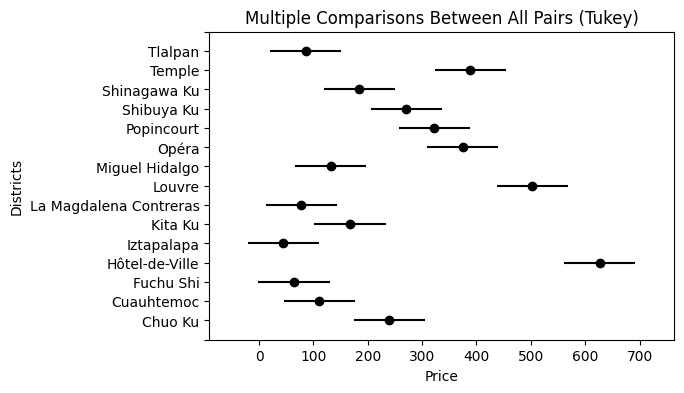

In [8]:
tukeyhsd.plot_simultaneous(figsize = (6,4), xlabel='Price', ylabel='Districts');

In [9]:
# Iterate over each unique country and create separate scatter plots
unique_countries = mean_prices['country'].unique()
for country in unique_countries:
    # Filter data for the current country
    country_data = mean_prices[mean_prices['country'] == country]

    # Create a new figure for each country
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        country_data['average_distance'], country_data['mean_price'],
        c=country_data['group'].astype('category').cat.codes,
        cmap='viridis', s=200, edgecolor='k'
    )
    if country == 'Mexico City':
        country = 'Mexico'

    # Add labels, title, and legend
    plt.title(f'Mean Price vs. Average Distance - {country}')
    plt.xlabel('Average Distance to City Center (km)')
    plt.ylabel('Mean Price')
    plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', 
                                   label=group, markersize=10, 
                                   markerfacecolor=scatter.cmap(scatter.norm(code)))
                        for group, code in zip(country_data['group'].unique(), 
                                               range(len(country_data['group'].unique())))],
               title="Districts")
    
    plt.tight_layout()
    plt.show()

NameError: name 'mean_prices' is not defined

              df        sum_sq       mean_sq           F        PR(>F)
group        3.0  1.016000e+07  3.386665e+06  108.694709  4.893708e-64
Residual  1596.0  4.972752e+07  3.115759e+04         NaN           NaN


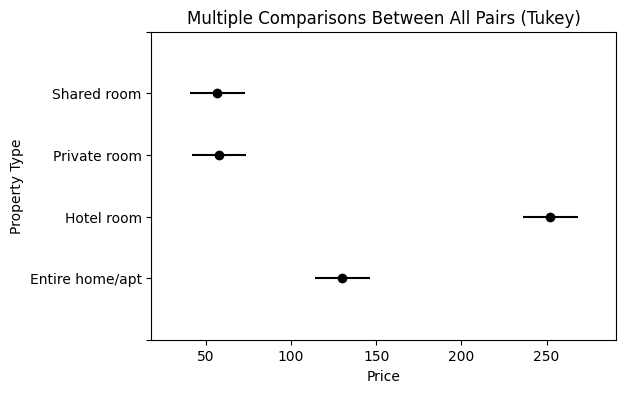

In [ ]:
data = {
    'value': pd.concat([
        df_Mexico_City[df_Mexico_City['room_type'] == 'Entire home/apt']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Mexico_City[df_Mexico_City['room_type'] == 'Hotel room']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Mexico_City[df_Mexico_City['room_type'] == 'Private room']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Mexico_City[df_Mexico_City['room_type'] == 'Shared room']['price'].sample(n=400, replace=True).reset_index(drop=True)
        
        # df_Paris[df_Paris['neighbourhood_cleansed'] == 'Hôtel-de-Ville']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Paris[df_Paris['neighbourhood_cleansed'] == 'Louvre']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Paris[df_Paris['neighbourhood_cleansed'] == 'Temple']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Paris[df_Paris['neighbourhood_cleansed'] == 'Opéra']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Paris[df_Paris['neighbourhood_cleansed'] == 'Popincourt']['price'].sample(n=400, replace=True).reset_index(drop=True),

        # df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Fuchu Shi']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Chuo Ku']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Shibuya Ku']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Kita Ku']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Shinagawa Ku']['price'].sample(n=400, replace=True).reset_index(drop=True)
    ], ignore_index=True),
    
    # 'distance': pd.concat([
    #     df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'La Magdalena Contreras']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Iztapalapa']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Cuauhtemoc']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Miguel Hidalgo']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Tlalpan']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),

    #     df_Paris[df_Paris['neighbourhood_cleansed'] == 'Hôtel-de-Ville']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Paris[df_Paris['neighbourhood_cleansed'] == 'Louvre']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Paris[df_Paris['neighbourhood_cleansed'] == 'Temple']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Paris[df_Paris['neighbourhood_cleansed'] == 'Opéra']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Paris[df_Paris['neighbourhood_cleansed'] == 'Popincourt']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),

    #     df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Fuchu Shi']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Chuo Ku']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Shibuya Ku']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Kita Ku']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Shinagawa Ku']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True)
    # ], ignore_index=True),
    
    # Add 'group' and 'country' lists to match the number of samples (400 per neighborhood)
    'group': (
        ['Entire home/apt'] * 400 + ['Hotel room'] * 400 + ['Private room'] * 400 + ['Shared room'] * 400 
        # + ['Hôtel-de-Ville'] * 400 + ['Louvre'] * 400 + ['Temple'] * 400 + 
        # ['Opéra'] * 400 + ['Popincourt'] * 400 +
        # ['Fuchu Shi'] * 400 + ['Chuo Ku'] * 400 + ['Shibuya Ku'] * 400 + 
        # ['Kita Ku'] * 400 + ['Shinagawa Ku'] * 400
    )
    
    # 'country': ['Mexico City'] * 2000 + ['Paris'] * 2000 + ['Tokyo'] * 2000
}

# Convert the dictionary to a DataFrame
df_2_ANOVA = pd.DataFrame(data)

# Fit the model
model = ols('value ~ group', data=df_2_ANOVA).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model)
print(anova_table)

tukeyhsd = pairwise_tukeyhsd(endog=df_2_ANOVA['value'], groups=df_2_ANOVA['group'], alpha=0.05)

# Convert Tukey HSD results to a DataFrame
tukey_results_df = pd.DataFrame(data=tukeyhsd._results_table.data[1:], columns=tukeyhsd._results_table.data[0])

# Export to CSV
tukey_results_df.to_csv('tukey_hsd_results_Mexico_City.csv', index=False)

tukeyhsd.summary()

tukeyhsd.plot_simultaneous(figsize = (6,4), xlabel='Price', ylabel='Property Type');

              df        sum_sq       mean_sq          F        PR(>F)
group        3.0  2.548198e+07  8.493993e+06  21.369842  1.428209e-13
Residual  1596.0  6.343712e+08  3.974757e+05        NaN           NaN


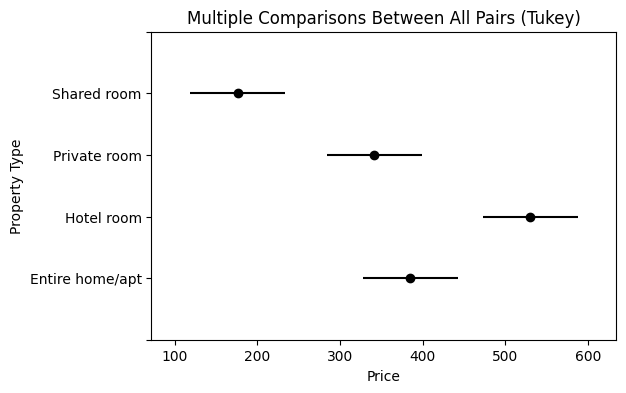

In [ ]:
data = {
    'value': pd.concat([
        # df_Mexico_City[df_Mexico_City['room_type'] == 'Entire home/apt']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Mexico_City[df_Mexico_City['room_type'] == 'Hotel room']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Mexico_City[df_Mexico_City['room_type'] == 'Private room']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Mexico_City[df_Mexico_City['room_type'] == 'Shared room']['price'].sample(n=400, replace=True).reset_index(drop=True)
        
        df_Paris[df_Paris['room_type'] == 'Entire home/apt']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Paris[df_Paris['room_type'] == 'Hotel room']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Paris[df_Paris['room_type'] == 'Private room']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Paris[df_Paris['room_type'] == 'Shared room']['price'].sample(n=400, replace=True).reset_index(drop=True)

        # df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Fuchu Shi']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Chuo Ku']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Shibuya Ku']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Kita Ku']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Shinagawa Ku']['price'].sample(n=400, replace=True).reset_index(drop=True)
    ], ignore_index=True),
    
    # 'distance': pd.concat([
    #     df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'La Magdalena Contreras']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Iztapalapa']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Cuauhtemoc']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Miguel Hidalgo']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Tlalpan']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),

    #     df_Paris[df_Paris['neighbourhood_cleansed'] == 'Hôtel-de-Ville']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Paris[df_Paris['neighbourhood_cleansed'] == 'Louvre']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Paris[df_Paris['neighbourhood_cleansed'] == 'Temple']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Paris[df_Paris['neighbourhood_cleansed'] == 'Opéra']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Paris[df_Paris['neighbourhood_cleansed'] == 'Popincourt']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),

    #     df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Fuchu Shi']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Chuo Ku']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Shibuya Ku']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Kita Ku']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Shinagawa Ku']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True)
    # ], ignore_index=True),
    
    # Add 'group' and 'country' lists to match the number of samples (400 per neighborhood)
    'group': (
        ['Entire home/apt'] * 400 + ['Hotel room'] * 400 + ['Private room'] * 400 + ['Shared room'] * 400 
        # + ['Hôtel-de-Ville'] * 400 + ['Louvre'] * 400 + ['Temple'] * 400 + 
        # ['Opéra'] * 400 + ['Popincourt'] * 400 +
        # ['Fuchu Shi'] * 400 + ['Chuo Ku'] * 400 + ['Shibuya Ku'] * 400 + 
        # ['Kita Ku'] * 400 + ['Shinagawa Ku'] * 400
    )
    
    # 'country': ['Mexico City'] * 2000 + ['Paris'] * 2000 + ['Tokyo'] * 2000
}

# Convert the dictionary to a DataFrame
df_2_ANOVA = pd.DataFrame(data)

# Fit the model
model = ols('value ~ group', data=df_2_ANOVA).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model)
print(anova_table)

tukeyhsd = pairwise_tukeyhsd(endog=df_2_ANOVA['value'], groups=df_2_ANOVA['group'], alpha=0.05)

# Convert Tukey HSD results to a DataFrame
tukey_results_df = pd.DataFrame(data=tukeyhsd._results_table.data[1:], columns=tukeyhsd._results_table.data[0])

# Export to CSV
tukey_results_df.to_csv('tukey_hsd_results_Paris.csv', index=False)

tukeyhsd.summary()

tukeyhsd.plot_simultaneous(figsize = (6,4), xlabel='Price', ylabel='Property Type');

              df        sum_sq       mean_sq         F   PR(>F)
group        3.0  7.898227e+06  2.632742e+06  4.629849  0.00314
Residual  1596.0  9.075580e+08  5.686454e+05       NaN      NaN


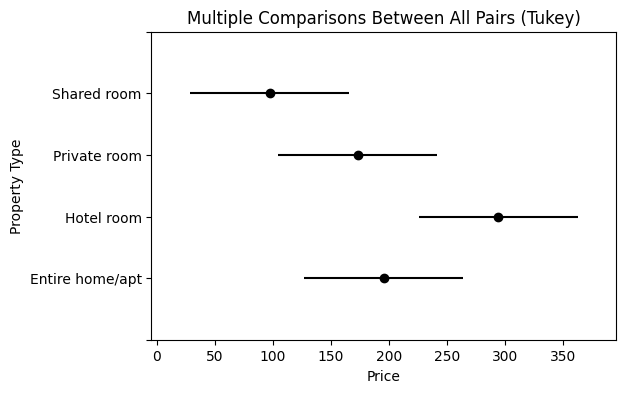

In [ ]:
data = {
    'value': pd.concat([
        # df_Mexico_City[df_Mexico_City['room_type'] == 'Entire home/apt']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Mexico_City[df_Mexico_City['room_type'] == 'Hotel room']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Mexico_City[df_Mexico_City['room_type'] == 'Private room']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Mexico_City[df_Mexico_City['room_type'] == 'Shared room']['price'].sample(n=400, replace=True).reset_index(drop=True)
        
        # df_Paris[df_Paris['room_type'] == 'Entire home/apt']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Paris[df_Paris['room_type'] == 'Hotel room']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Paris[df_Paris['room_type'] == 'Private room']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Paris[df_Paris['room_type'] == 'Shared room']['price'].sample(n=400, replace=True).reset_index(drop=True)

        df_Tokyo[df_Tokyo['room_type'] == 'Entire home/apt']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Tokyo[df_Tokyo['room_type'] == 'Hotel room']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Tokyo[df_Tokyo['room_type'] == 'Private room']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Tokyo[df_Tokyo['room_type'] == 'Shared room']['price'].sample(n=400, replace=True).reset_index(drop=True),
        # df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Shinagawa Ku']['price'].sample(n=400, replace=True).reset_index(drop=True)
    ], ignore_index=True),
    
    # 'distance': pd.concat([
    #     df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'La Magdalena Contreras']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Iztapalapa']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Cuauhtemoc']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Miguel Hidalgo']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Tlalpan']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),

    #     df_Paris[df_Paris['neighbourhood_cleansed'] == 'Hôtel-de-Ville']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Paris[df_Paris['neighbourhood_cleansed'] == 'Louvre']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Paris[df_Paris['neighbourhood_cleansed'] == 'Temple']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Paris[df_Paris['neighbourhood_cleansed'] == 'Opéra']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Paris[df_Paris['neighbourhood_cleansed'] == 'Popincourt']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),

    #     df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Fuchu Shi']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Chuo Ku']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Shibuya Ku']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Kita Ku']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Shinagawa Ku']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True)
    # ], ignore_index=True),
    
    # Add 'group' and 'country' lists to match the number of samples (400 per neighborhood)
    'group': (
        ['Entire home/apt'] * 400 + ['Hotel room'] * 400 + ['Private room'] * 400 + ['Shared room'] * 400 
        # + ['Hôtel-de-Ville'] * 400 + ['Louvre'] * 400 + ['Temple'] * 400 + 
        # ['Opéra'] * 400 + ['Popincourt'] * 400 +
        # ['Fuchu Shi'] * 400 + ['Chuo Ku'] * 400 + ['Shibuya Ku'] * 400 + 
        # ['Kita Ku'] * 400 + ['Shinagawa Ku'] * 400
    )
    
    # 'country': ['Mexico City'] * 2000 + ['Paris'] * 2000 + ['Tokyo'] * 2000
}

# Convert the dictionary to a DataFrame
df_2_ANOVA = pd.DataFrame(data)

# Fit the model
model = ols('value ~ group', data=df_2_ANOVA).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model)
print(anova_table)

tukeyhsd = pairwise_tukeyhsd(endog=df_2_ANOVA['value'], groups=df_2_ANOVA['group'], alpha=0.05)

# Convert Tukey HSD results to a DataFrame
tukey_results_df = pd.DataFrame(data=tukeyhsd._results_table.data[1:], columns=tukeyhsd._results_table.data[0])

# Export to CSV
tukey_results_df.to_csv('tukey_hsd_results_Tokyo.csv', index=False)

tukeyhsd.summary()

tukeyhsd.plot_simultaneous(figsize = (6,4), xlabel='Price', ylabel='Property Type');

plt.show()

               df        sum_sq       mean_sq          F        PR(>F)
room_type    11.0  1.386369e+08  1.260336e+07  26.650507  1.389326e-54
Residual   4788.0  2.264305e+09  4.729125e+05        NaN           NaN


group1,group2,meandiff,p-adj,lower,upper,reject
Mexico City - Entire home/apt,Mexico City - Hotel room,110.1563,0.5018,-48.8355,269.1481,False
Mexico City - Entire home/apt,Mexico City - Private room,-79.1707,0.899,-238.1625,79.8211,False
Mexico City - Entire home/apt,Mexico City - Shared room,-87.3483,0.8204,-246.3401,71.6435,False
Mexico City - Entire home/apt,Paris - Entire home/apt,360.1792,0.0,201.1874,519.171,True
Mexico City - Entire home/apt,Paris - Hotel room,382.8309,0.0,223.839,541.8227,True
Mexico City - Entire home/apt,Paris - Private room,198.5883,0.0026,39.5964,357.5801,True
Mexico City - Entire home/apt,Paris - Shared room,29.4805,1.0,-129.5113,188.4723,False
Mexico City - Entire home/apt,Tokyo - Entire home/apt,48.4818,0.9978,-110.51,207.4737,False
Mexico City - Entire home/apt,Tokyo - Hotel room,354.3494,0.0,195.3575,513.3412,True
Mexico City - Entire home/apt,Tokyo - Private room,-2.3592,1.0,-161.351,156.6327,False


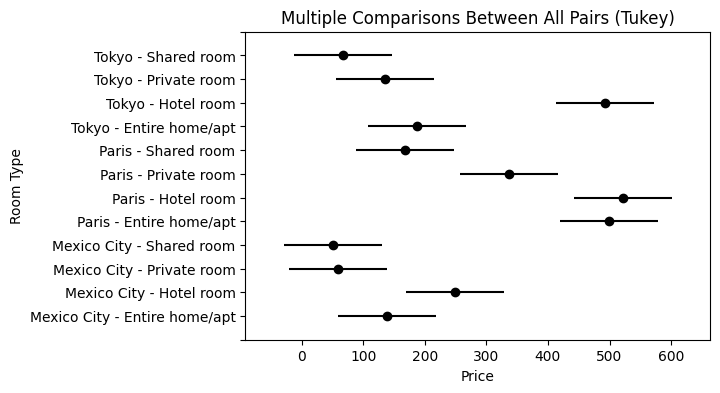

In [ ]:
data = {
    'value': pd.concat([
        df_Mexico_City[df_Mexico_City['room_type'] == 'Entire home/apt']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Mexico_City[df_Mexico_City['room_type'] == 'Hotel room']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Mexico_City[df_Mexico_City['room_type'] == 'Private room']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Mexico_City[df_Mexico_City['room_type'] == 'Shared room']['price'].sample(n=400, replace=True).reset_index(drop=True),
        
        df_Paris[df_Paris['room_type'] == 'Entire home/apt']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Paris[df_Paris['room_type'] == 'Hotel room']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Paris[df_Paris['room_type'] == 'Private room']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Paris[df_Paris['room_type'] == 'Shared room']['price'].sample(n=400, replace=True).reset_index(drop=True),

        df_Tokyo[df_Tokyo['room_type'] == 'Entire home/apt']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Tokyo[df_Tokyo['room_type'] == 'Hotel room']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Tokyo[df_Tokyo['room_type'] == 'Private room']['price'].sample(n=400, replace=True).reset_index(drop=True),
        df_Tokyo[df_Tokyo['room_type'] == 'Shared room']['price'].sample(n=400, replace=True).reset_index(drop=True)
        # df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Shinagawa Ku']['price'].sample(n=400, replace=True).reset_index(drop=True)
    ], ignore_index=True),
    
    # 'distance': pd.concat([
    #     df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'La Magdalena Contreras']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Iztapalapa']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Cuauhtemoc']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Miguel Hidalgo']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'] == 'Tlalpan']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),

    #     df_Paris[df_Paris['neighbourhood_cleansed'] == 'Hôtel-de-Ville']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Paris[df_Paris['neighbourhood_cleansed'] == 'Louvre']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Paris[df_Paris['neighbourhood_cleansed'] == 'Temple']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Paris[df_Paris['neighbourhood_cleansed'] == 'Opéra']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Paris[df_Paris['neighbourhood_cleansed'] == 'Popincourt']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),

    #     df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Fuchu Shi']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Chuo Ku']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Shibuya Ku']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Kita Ku']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True),
    #     df_Tokyo[df_Tokyo['neighbourhood_cleansed'] == 'Shinagawa Ku']['Average_Distance_to_Attractions_km'].sample(n=400, replace=True).reset_index(drop=True)
    # ], ignore_index=True),
    
    # Add 'group' and 'country' lists to match the number of samples (400 per neighborhood)
    'room_type': (
        ['Mexico City - Entire home/apt'] * 400 + ['Mexico City - Hotel room'] * 400 + ['Mexico City - Private room'] * 400 + ['Mexico City - Shared room'] * 400 +
         ['Paris - Entire home/apt'] * 400 + ['Paris - Hotel room'] * 400 + ['Paris - Private room'] * 400 + ['Paris - Shared room'] * 400 +
         ['Tokyo - Entire home/apt'] * 400 + ['Tokyo - Hotel room'] * 400 + ['Tokyo - Private room'] * 400 + ['Tokyo - Shared room'] * 400 
    ),
    
    'country': ['Mexico City'] * 400*4 + ['Paris'] * 400*4 + ['Tokyo'] * 400*4
}

# Convert the dictionary to a DataFrame
df_2_ANOVA = pd.DataFrame(data)

# Fit the model
model = ols('value ~ room_type', data=df_2_ANOVA).fit()

# ANOVA table
anova_table = sm.stats.anova_lm(model)
print(anova_table)

tukeyhsd = pairwise_tukeyhsd(endog=df_2_ANOVA['value'], groups=df_2_ANOVA['room_type'], alpha=0.05)

# Convert Tukey HSD results to a DataFrame
tukey_results_df = pd.DataFrame(data=tukeyhsd._results_table.data[1:], columns=tukeyhsd._results_table.data[0])

# Export to CSV
tukey_results_df.to_csv('tukey_hsd_results_Room_Type.csv', index=False)



tukeyhsd.plot_simultaneous(figsize = (6,4), xlabel='Price', ylabel='Room Type');

tukeyhsd.summary()

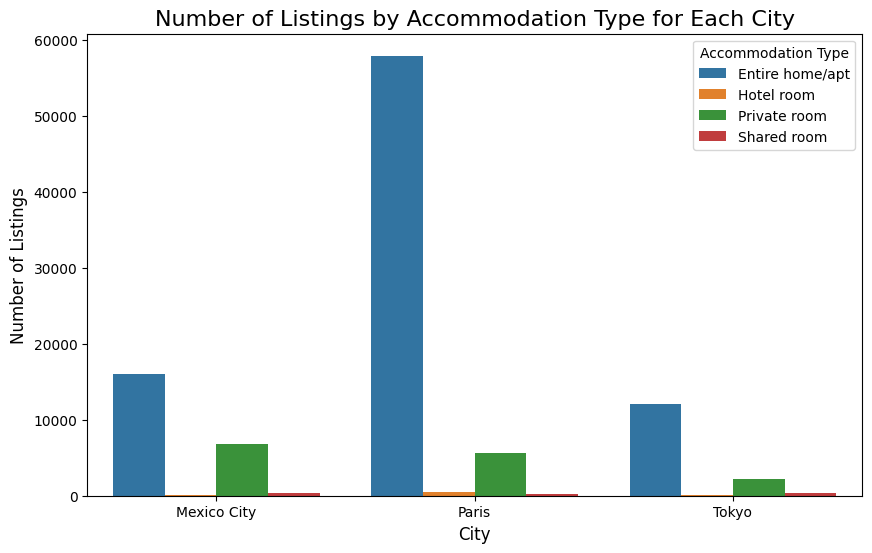

c:\Users\ayush\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\categorical.py:379: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  ax.set_xlim(-.5, n - .5, auto=None)


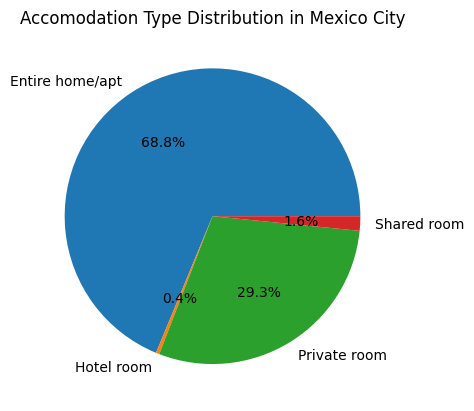

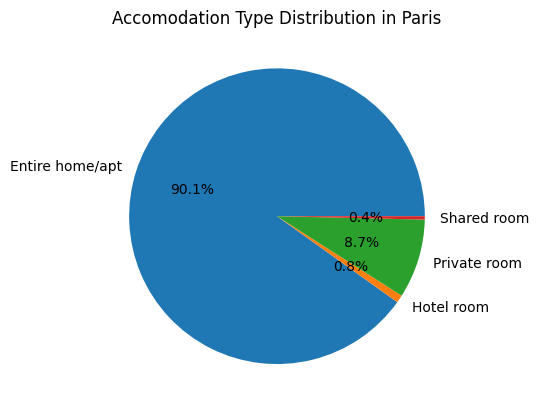

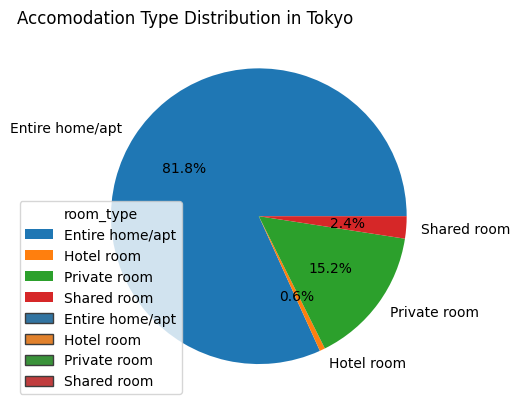

<Figure size 1000x600 with 0 Axes>

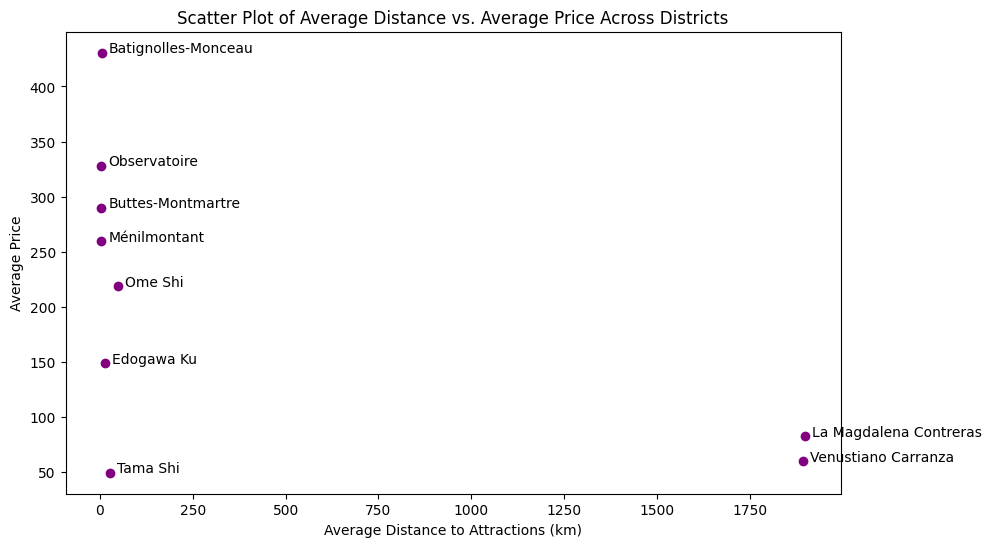

In [ ]:
d = combined_df[(combined_df['City'] == 'Mexico City') | (combined_df['City'] == 'Paris') | (combined_df['City'] == 'Tokyo')]

listing_counts = d.groupby(['City', 'room_type']).size().reset_index(name='Count')

listing_counts['Log_Count'] = np.log(listing_counts['Count'])

# Set the size of the plot
plt.figure(figsize=(10, 6))

# Plotting the data using seaborn with log-transformed counts
sns.barplot(x='City', y='Count', hue='room_type', data=listing_counts)

# Set the title and labels
plt.title('Number of Listings by Accommodation Type for Each City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Number of Listings', fontsize=12)
plt.legend(title='Accommodation Type')

# Display the plot
plt.show()

for city in listing_counts['City'].unique():
    plt.figure()
    city_data = listing_counts[listing_counts['City'] == city]
    plt.pie(city_data['Count'], labels=city_data['room_type'], autopct='%1.1f%%')
    plt.title(f'Accomodation Type Distribution in {city}')


plt.figure(figsize=(10, 6))

kt = df_Mexico_City[df_Mexico_City['neighbourhood_cleansed'].isin([
    'Venustiano Carranza', 'Coyoacán', #'Azcapotzalco',
    'La Magdalena Contreras'
])]
kt = pd.concat([
    kt, 
    df_Tokyo[df_Tokyo['neighbourhood_cleansed'].isin(['Tama Shi',  'Ome Shi', 'Edogawa Ku'])], #'Akishima Shi',
    df_Paris[df_Paris['neighbourhood_cleansed'].isin(['Buttes-Montmartre', 'Ménilmontant', 'Batignolles-Monceau', 'Observatoire'])
]], ignore_index=True)

kt_avg = kt.groupby('neighbourhood_cleansed').agg({
    'Average_Distance_to_Attractions_km': 'mean',
    'price': 'mean'
}).reset_index()

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(kt_avg['Average_Distance_to_Attractions_km'], kt_avg['price'], color='purple')

# Adding labels and title
for i, district in enumerate(kt_avg['neighbourhood_cleansed']):
    plt.annotate(district, (kt_avg['Average_Distance_to_Attractions_km'][i], kt_avg['price'][i]), 
                 textcoords="offset points", xytext=(5, 0), ha='left')

plt.xlabel('Average Distance to Attractions (km)')
plt.ylabel('Average Price')
plt.title('Scatter Plot of Average Distance vs. Average Price Across Districts')
plt.show()

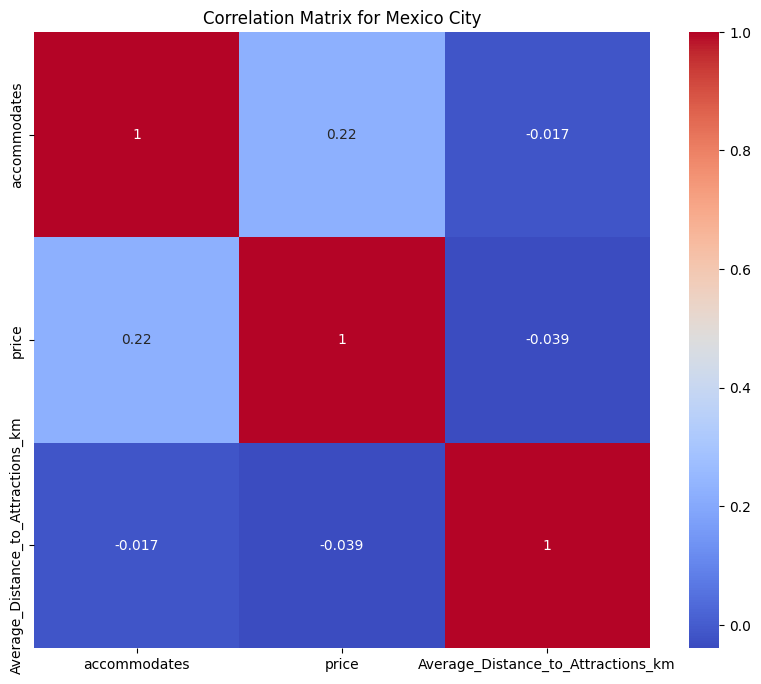

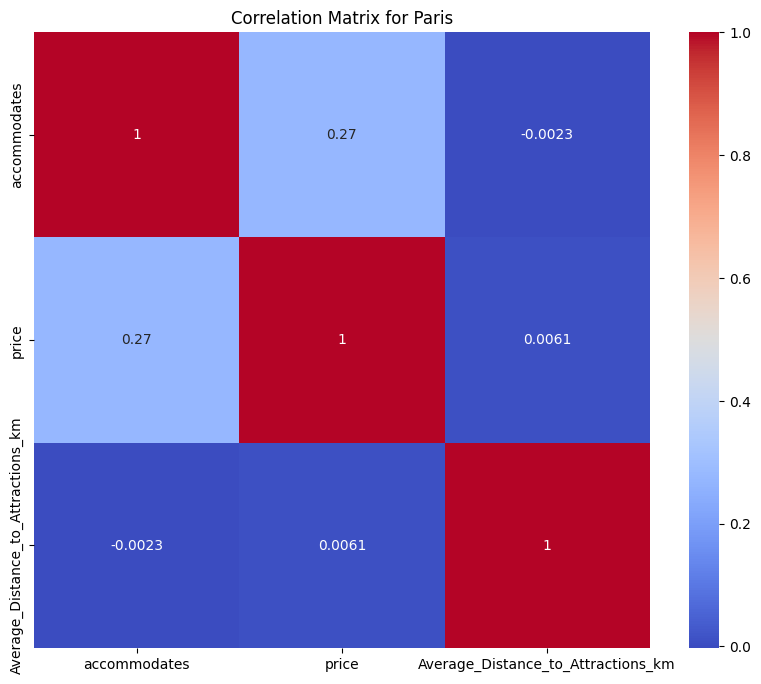

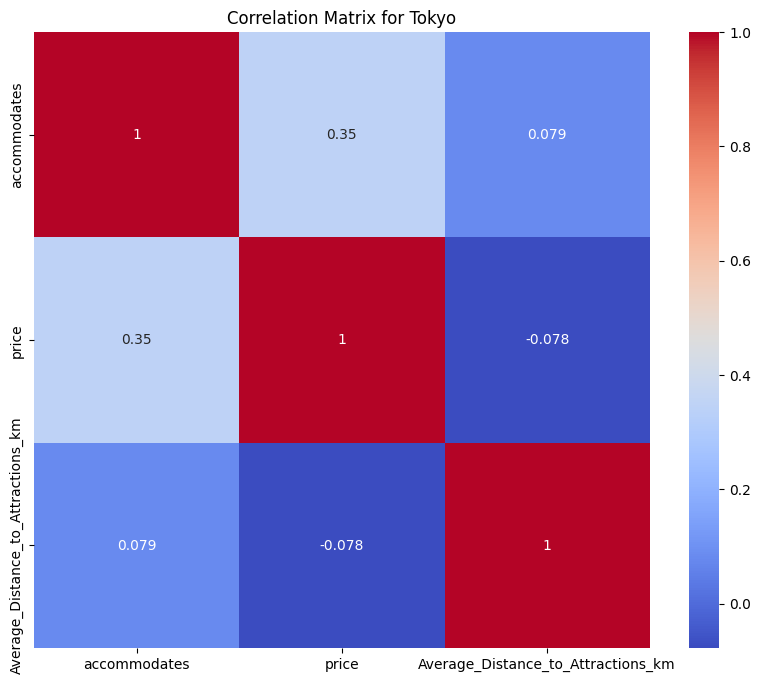

In [14]:
def plot_correlation_matrix(df, city_name):
    numeric_df = df.select_dtypes(include=['float64', 'int64'])
    numeric_df = numeric_df[['accommodates', 'price', 'Average_Distance_to_Attractions_km']]
    # Compute correlation matrix
    correlation_matrix = numeric_df.corr()
    
    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', square=True)
    plt.title(f'Correlation Matrix for {city_name}')
    plt.show()

# Generate plots for each city
plot_correlation_matrix(df_Mexico_City, 'Mexico City')
plot_correlation_matrix(df_Paris, 'Paris')
plot_correlation_matrix(df_Tokyo, 'Tokyo')